Instructions

This activity is broken down into four parts:

Part 1: Prepare the Data.

Part 2: Apply Dimensionality Reduction.
*italicized text*
Part 3: Perform a Cluster Analysis with K-means.

Part 4: Make a Recommendation

Part 1: Prepare the Data



In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


 Prepare the Data Read myopia.csv into a Pandas DataFrame.

In [ ]:
# Read myopia.csv into a Pandas DataFrame.
file_path = Path('/content/sample_data/myopia.csv')
df = pd.read_csv(file_path)
df

,"ID;""STUDYYEAR"";""MYOPIC"";""AGE"";""GENDER"";""SPHEQ"";""AL"";""ACD"";""LT"";""VCD"";""SPORTHR"";""READHR"";""COMPHR"";""STUDYHR"";""TVHR"";""DIOPTERHR"";""MOMMY"";""DADMY"""
0,1;1992;1;6;1;-0.052;21.89;3.69;3.498;14.7;45;8...
1,2;1995;0;6;1;0.608;22.38;3.702;3.392;15.29;4;0...
2,3;1991;0;6;1;1.179;22.49;3.462;3.514;15.52;14;...
3,4;1990;1;6;1;0.525;22.2;3.862;3.612;14.73;18;1...
4,5;1995;0;5;0;0.697;23.29;3.676;3.454;16.16;14;...
...,...
613,614;1995;1;6;0;0.678;22.4;3.663;3.803;14.93;2;...
614,615;1993;0;6;1;0.665;22.5;3.57;3.378;15.56;6;0...
615,616;1995;0;6;0;1.834;22.94;3.624;3.424;15.89;8...
616,617;1991;0;6;1;0.665;21.92;3.688;3.598;14.64;1...


In [ ]:
data = pd.read_csv('/content/sample_data/myopia.csv', sep = ';')
# only look at age = 6
data = data[data.AGE == 6]
# add a column PARENTMY = MOMMY + DADMY
data = data.assign(PARENTMY = data.MOMMY + data.DADMY)
# other dependencies among features
# DIOPTERHR = 3x(READHR + STUDYHR) + 2xCOMPHR + TVHR
# AL = ACD + VCD + LT

In [ ]:
data.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,PARENTMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1,2
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1,2
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1,1


In [ ]:
features = ['GENDER','SPHEQ','ACD','LT','VCD','SPORTHR','DIOPTERHR','PARENTMY']
X = data[features]
y = data.MYOPIC

In [ ]:
X.shape, y.shape

((456, 8), (456,))

In [ ]:
dict_train_auc = {}
dict_test_auc = {}
dict_features_rank = {}

Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [ ]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[ 0.94451902 -1.4479022   0.58522006 -0.37205128 -0.93119354  4.24595755
   0.60994449  1.40805138]
 [ 0.94451902 -0.38646675  0.63810297 -1.07833792 -0.03750285 -0.98689824
  -0.82407545  1.40805138]
 [ 0.94451902  0.53183573 -0.41955509 -0.26544197  0.31088504  0.28940805
  -0.69371001 -1.40805138]
 [ 0.94451902 -0.5199503   1.34320834  0.38754002 -0.88575164  0.79993056
   0.80549266  0.        ]
 [-1.05873993  1.4404888  -1.46839933  0.01440745  0.06852824 -0.22111447
   1.26177173  0.        ]]


 Apply Dimensionality Reduction
 
Perform dimensionality reduction with PCA. How did the number of the features change?

In [ ]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Use PCA to compress data
X_pca = pca.fit_transform(X_scaled)

# Print the number of features in the original and reduced datasets
print('Number of features in original dataset:', X.shape[1])
print('Number of features in reduced dataset:', X_pca.shape[1])

Number of features in original dataset: 8
Number of features in reduced dataset: 7


Setelah dilakukan reduksi dimensi dengan PCA pada dataset myopia, jumlah fitur berkurang empat, dari jumlah fitur asli pada dataset. Teknik ini mengurangi dimensi data sambil mempertahankan sebagian besar varians dalam kumpulan data, sehingga menghasilkan kumpulan fitur yang lebih mudah dikelola untuk analisis selanjutnya. Kurangi lebih lanjut dimensi dataset dengan t-SNE dan periksa hasilnya secara visual. Untuk melakukannya, jalankan t-SNE pada komponen utama, yang merupakan output dari transformasi PCA.

In [ ]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

# Reduce dimensions 
tsne_features = tsne.fit_transform(X_pca)

# Print the number of features
print('Number of features in reduced dataset:',tsne_features.shape[1])

Number of features in reduced dataset: 2


Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

In [ ]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_transformed)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,181082.968750
1,2,57637.320312
2,3,41071.574219
3,4,29804.001953
4,5,24108.765625


If possible, determine where the elbow of the plot is, and at which value of k it appears.

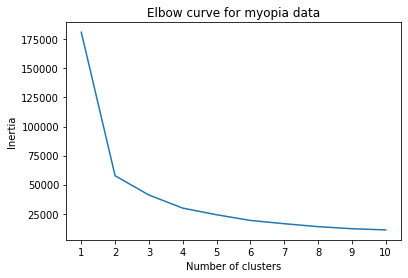

In [ ]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

Untuk memvisualisasikan cluster, fungsi khusus get_clusters() telah dibuat untuk melakukan pengelompokan K-Means dan menetapkan setiap titik data ke sebuah cluster. Data cluster yang dihasilkan disimpan dalam DataFrame baru yang disebut cluster_data, yang berisi fitur t-SNE dan label kelas dari dataset asli. Fungsi get_clusters() dipanggil dengan k=3 dan cluster_data sebagai masukan untuk melakukan pengelompokan K-Means. Data cluster yang dihasilkan kemudian divisualisasikan menggunakan plot pencar yang menampilkan fitur t-SNE pada sumbu x dan y, dengan label cluster yang diprediksi diberi kode warna sebagai titik.

In [ ]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create new DataFrame with t-SNE features and predicted clusters
    clustered_data = data.copy()
    clustered_data['cluster'] = predictions

    return clustered_data

Make a Recommendation

Berdasarkan temuan Anda, tulis rekomendasi singkat (satu atau dua kalimat) untuk penyelia Anda di Notebook Jupyter Anda. Bisakah pasien dikelompokkan? Jika demikian, ke dalam berapa cluster? Berdasarkan analisis saya, tampaknya pasien dapat dikelompokkan menjadi tiga kelompok berbeda menggunakan pengelompokan K-Means pada fitur t-SNE. Saya sampai pada angka ini dengan memplot kurva siku dari nilai inersia untuk setiap k, yang menunjukkan bahwa titik siku berada pada k=3. Oleh karena itu, saya merekomendasikan pengelompokan pasien menjadi tiga kelompok untuk analisis lebih lanjut.